In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Read the data files
walking_acc = pd.read_csv('../Kebutuhan/(Walking) 2025-11-04 16-11-45.csv')
running_acc = pd.read_csv('../Kebutuhan/(Running) 2025-11-04 16-15-33.csv')
walking_gyro = pd.read_csv('../Kebutuhan/Gyro_Walking.csv')
running_gyro = pd.read_csv('../Kebutuhan/Gyro_Running.csv')

In [2]:
# Function to resample data to a specific frequency
def resample_data(df, target_freq):
    time = df['Time (s)'].values
    dt = np.mean(np.diff(time))
    regular_time = np.arange(time[0], time[-1], 1/target_freq)
    
    resampled_data = {}
    for column in df.columns:
        if column != 'Time (s)':
            resampled_data[column] = np.interp(regular_time, time, df[column].values)
    
    resampled_df = pd.DataFrame(resampled_data)
    resampled_df['Time (s)'] = regular_time
    return resampled_df

# Function to apply Low Pass Filter
def apply_lpf(data, fs, cutoff_freq):
    nyquist = fs/2
    order = 4
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Function to apply High Pass Filter
def apply_hpf(data, fs, cutoff_freq):
    nyquist = fs/2
    order = 4
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Function to calculate SNR
def calculate_snr(original_signal, filtered_signal):
    # The filtered signal is considered as the "clean" signal
    signal_power = np.mean(filtered_signal ** 2)
    
    # The noise is the difference between original and filtered
    noise = original_signal - filtered_signal
    noise_power = np.mean(noise ** 2)
    
    # Calculate SNR in dB
    if noise_power > 0:
        snr_db = 10 * np.log10(signal_power / noise_power)
    else:
        snr_db = float('inf')
    
    return snr_db

# Function to analyze data with different sampling rates
def analyze_signal(df, column, sampling_rates, filter_type, cutoff_freq, title):
    results = []
    
    for fs in sampling_rates:
        # Resample data
        resampled_df = resample_data(df, fs)
        original_data = resampled_df[column].values
        
        # Apply filter
        if filter_type == 'lpf':
            filtered_data = apply_lpf(original_data, fs, cutoff_freq)
        else:  # hpf
            filtered_data = apply_hpf(original_data, fs, cutoff_freq)
        
        # Calculate SNR
        snr = calculate_snr(original_data, filtered_data)
        results.append({
            'sampling_rate': fs,
            'snr': snr
        })
        
        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(resampled_df['Time (s)'], original_data, label='Original', alpha=0.5)
        plt.plot(resampled_df['Time (s)'], filtered_data, label='Filtered', linewidth=2)
        plt.title(f'{title} - {fs}Hz Sampling Rate\nSNR: {snr:.2f} dB')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    return results

# SNR Analysis for Different Sampling Rates

We'll analyze the Signal-to-Noise Ratio (SNR) for both accelerometer and gyroscope data at different sampling rates. A higher SNR indicates better signal quality.

=== Walking Analysis ===

Accelerometer Walking Analysis (LPF with cutoff = 1.2 Hz):


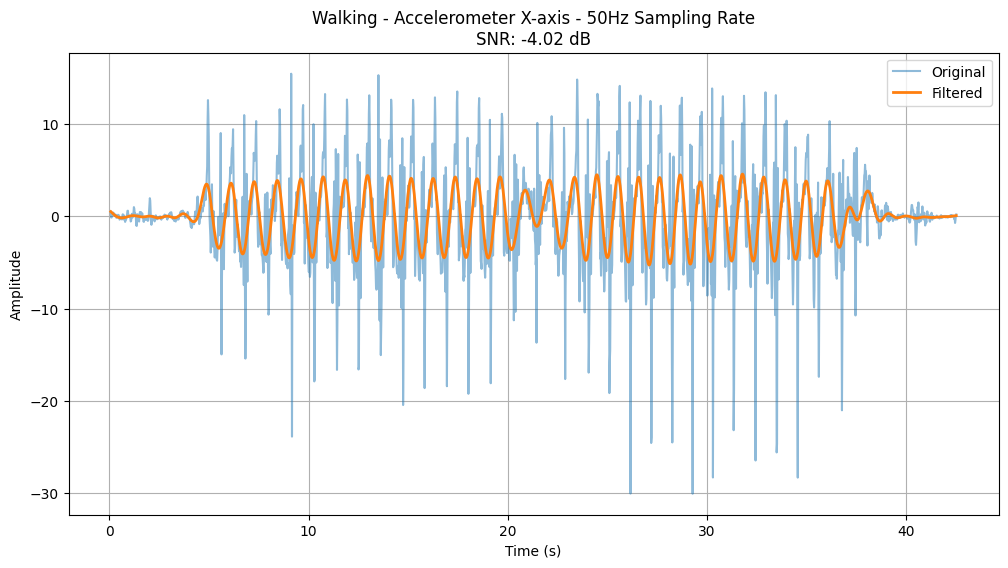

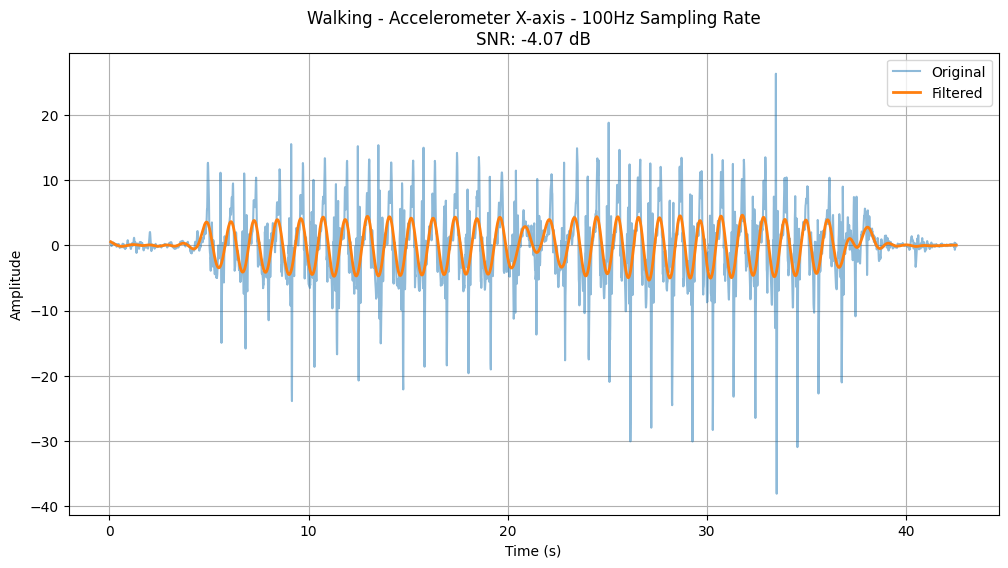


Gyroscope Walking Analysis (HPF with cutoff = 17.5 Hz):


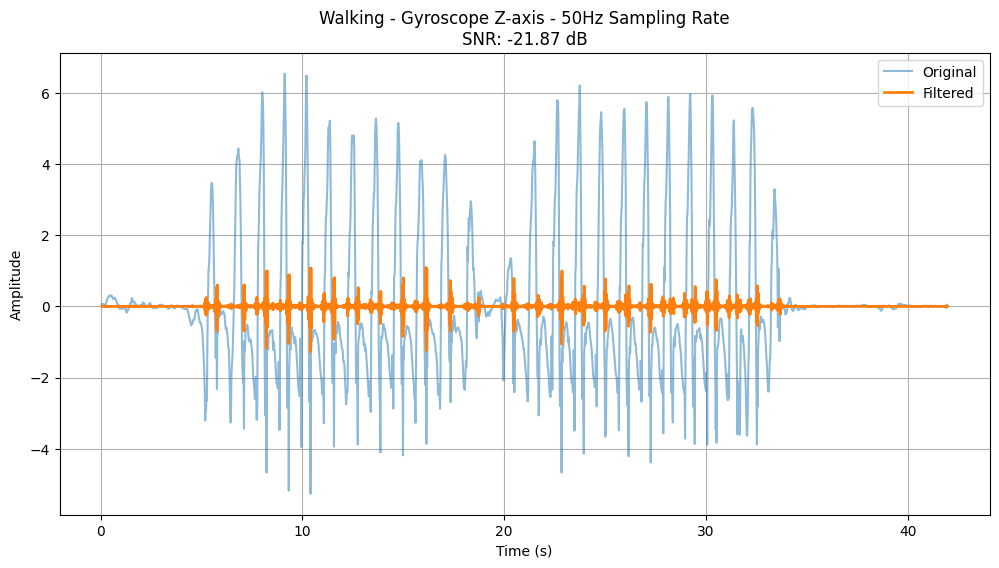

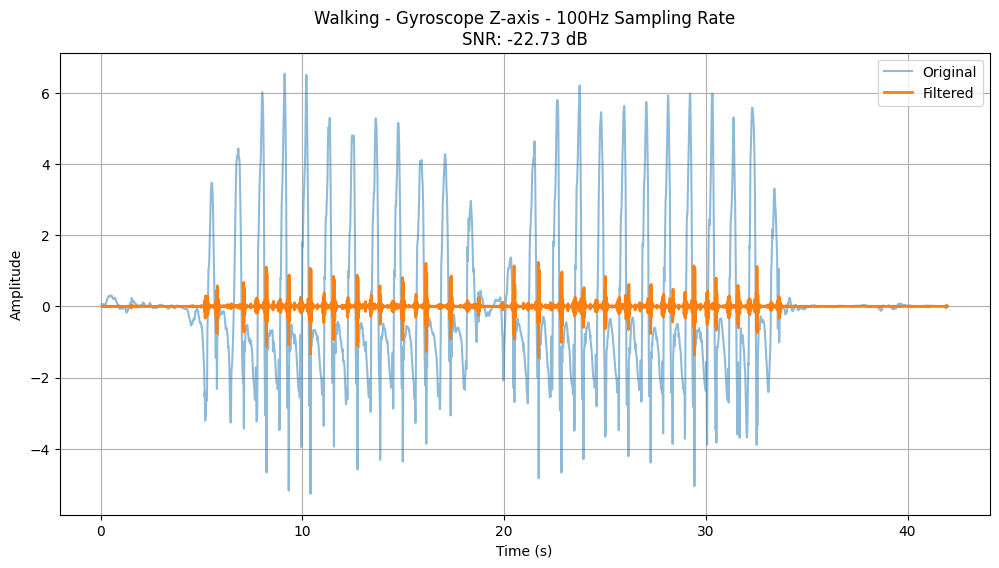


=== Running Analysis ===

Accelerometer Running Analysis (LPF with cutoff = 1.2 Hz):


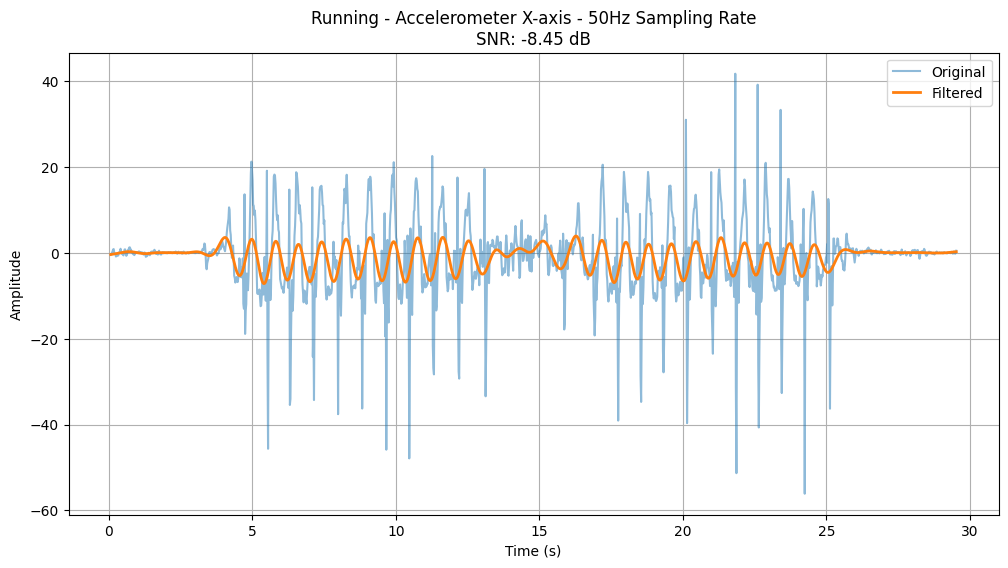

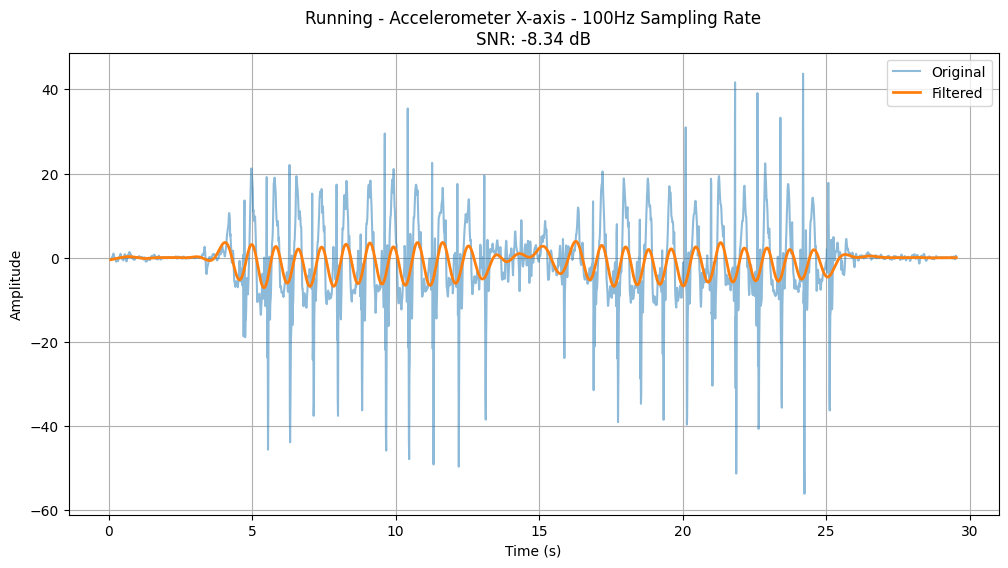


Gyroscope Running Analysis (HPF with cutoff = 17.5 Hz):


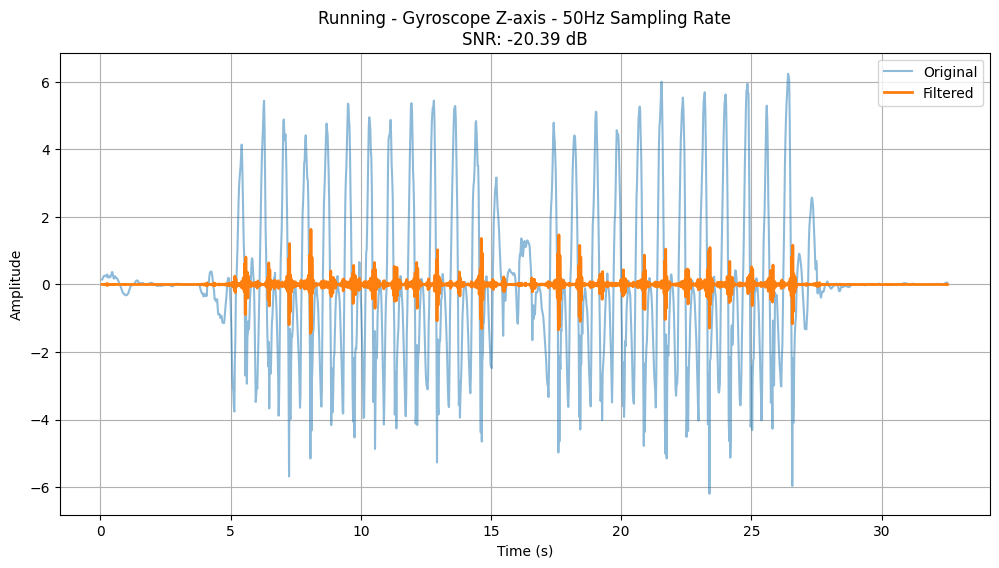

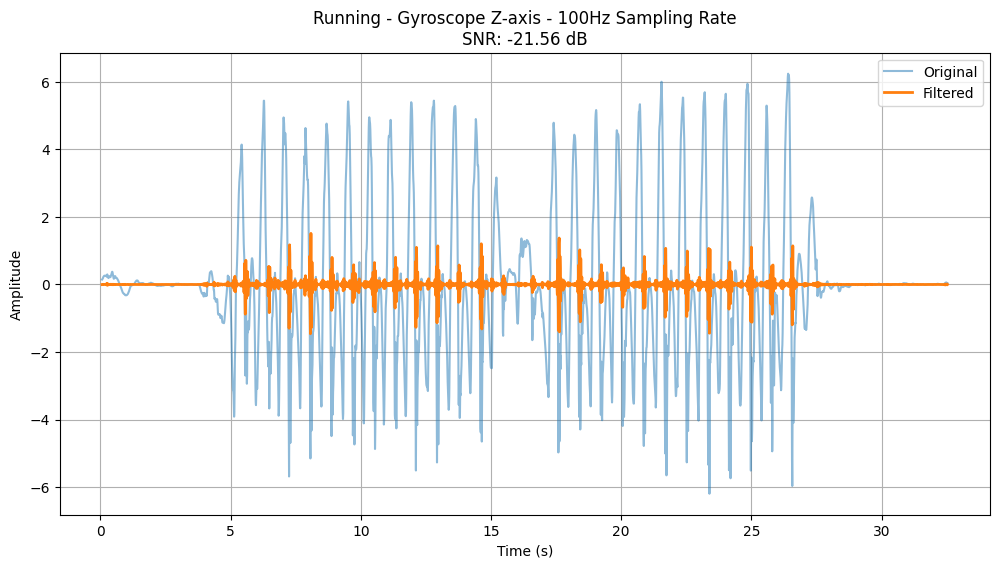

In [3]:
# Analyze Walking Data
print("=== Walking Analysis ===")

# Accelerometer analysis (Walking)
print("\nAccelerometer Walking Analysis (LPF with cutoff = 1.2 Hz):")
acc_walking_results = analyze_signal(
    walking_acc,
    'Linear Acceleration x (m/s^2)',
    [50, 100],
    'lpf',
    1.2,
    'Walking - Accelerometer X-axis'
)

# Gyroscope analysis (Walking)
print("\nGyroscope Walking Analysis (HPF with cutoff = 17.5 Hz):")
gyro_walking_results = analyze_signal(
    walking_gyro,
    'Gyroscope z (rad/s)',
    [50, 100],
    'hpf',
    17.5,
    'Walking - Gyroscope Z-axis'
)

# Analyze Running Data
print("\n=== Running Analysis ===")

# Accelerometer analysis (Running)
print("\nAccelerometer Running Analysis (LPF with cutoff = 1.2 Hz):")
acc_running_results = analyze_signal(
    running_acc,
    'Linear Acceleration x (m/s^2)',
    [50, 100],
    'lpf',
    1.2,
    'Running - Accelerometer X-axis'
)

# Gyroscope analysis (Running)
print("\nGyroscope Running Analysis (HPF with cutoff = 17.5 Hz):")
gyro_running_results = analyze_signal(
    running_gyro,
    'Gyroscope z (rad/s)',
    [50, 100],
    'hpf',
    17.5,
    'Running - Gyroscope Z-axis'
)

In [4]:
# Function to calculate SNR
def calculate_snr(original_signal, filtered_signal):
    # The filtered signal is considered as the "clean" signal
    signal_power = np.mean(filtered_signal ** 2)
    
    # The noise is the difference between original and filtered
    noise = original_signal - filtered_signal
    noise_power = np.mean(noise ** 2)
    
    # Calculate SNR in dB
    if noise_power > 0:
        snr_db = 10 * np.log10(signal_power / noise_power)
    else:
        snr_db = float('inf')
    
    return snr_db

# Function to process and calculate SNR
def process_and_calculate_snr(df, column, sampling_freq, filter_type, cutoff_freq):
    # Resample data
    resampled_df = resample_data(df, sampling_freq)
    original_data = resampled_df[column].values
    
    # Apply filter
    if filter_type == 'lpf':
        filtered_data = apply_lpf(original_data, sampling_freq, cutoff_freq)
    else:  # hpf
        filtered_data = apply_hpf(original_data, sampling_freq, cutoff_freq)
    
    # Calculate SNR
    snr = calculate_snr(original_data, filtered_data)
    return snr

print("=== SNR Analysis Results ===\n")

# Walking Accelerometer Analysis
print("Walking - Accelerometer (LPF 1.2 Hz):")
walking_acc_snr_50hz = process_and_calculate_snr(walking_acc, 'Linear Acceleration x (m/s^2)', 50, 'lpf', 1.2)
walking_acc_snr_100hz = process_and_calculate_snr(walking_acc, 'Linear Acceleration x (m/s^2)', 100, 'lpf', 1.2)
print(f"50 Hz Sampling: {walking_acc_snr_50hz:.2f} dB")
print(f"100 Hz Sampling: {walking_acc_snr_100hz:.2f} dB")

# Running Accelerometer Analysis
print("\nRunning - Accelerometer (LPF 1.2 Hz):")
running_acc_snr_50hz = process_and_calculate_snr(running_acc, 'Linear Acceleration x (m/s^2)', 50, 'lpf', 1.2)
running_acc_snr_100hz = process_and_calculate_snr(running_acc, 'Linear Acceleration x (m/s^2)', 100, 'lpf', 1.2)
print(f"50 Hz Sampling: {running_acc_snr_50hz:.2f} dB")
print(f"100 Hz Sampling: {running_acc_snr_100hz:.2f} dB")

# Walking Gyroscope Analysis
print("\nWalking - Gyroscope (HPF 17.5 Hz):")
walking_gyro_snr_50hz = process_and_calculate_snr(walking_gyro, 'Gyroscope z (rad/s)', 50, 'hpf', 17.5)
walking_gyro_snr_100hz = process_and_calculate_snr(walking_gyro, 'Gyroscope z (rad/s)', 100, 'hpf', 17.5)
print(f"50 Hz Sampling: {walking_gyro_snr_50hz:.2f} dB")
print(f"100 Hz Sampling: {walking_gyro_snr_100hz:.2f} dB")

# Running Gyroscope Analysis
print("\nRunning - Gyroscope (HPF 17.5 Hz):")
running_gyro_snr_50hz = process_and_calculate_snr(running_gyro, 'Gyroscope z (rad/s)', 50, 'hpf', 17.5)
running_gyro_snr_100hz = process_and_calculate_snr(running_gyro, 'Gyroscope z (rad/s)', 100, 'hpf', 17.5)
print(f"50 Hz Sampling: {running_gyro_snr_50hz:.2f} dB")
print(f"100 Hz Sampling: {running_gyro_snr_100hz:.2f} dB")

=== SNR Analysis Results ===

Walking - Accelerometer (LPF 1.2 Hz):
50 Hz Sampling: -4.02 dB
100 Hz Sampling: -4.07 dB

Running - Accelerometer (LPF 1.2 Hz):
50 Hz Sampling: -8.45 dB
100 Hz Sampling: -8.34 dB

Walking - Gyroscope (HPF 17.5 Hz):
50 Hz Sampling: -21.87 dB
100 Hz Sampling: -22.73 dB

Running - Gyroscope (HPF 17.5 Hz):
50 Hz Sampling: -20.39 dB
100 Hz Sampling: -21.56 dB


# Analisis SNR dengan Filter Sesuai Ketentuan

## Parameter Filter yang Digunakan:
1. Accelerometer - Low Pass Filter (LPF):
   - Frekuensi cutoff: 1.2 Hz (sesuai ketentuan: 0.8 Hz - 1.5 Hz)
   - Tujuan: Memfilter noise frekuensi tinggi, menyisakan gerakan dasar

2. Gyroscope - High Pass Filter (HPF):
   - Frekuensi cutoff: 17.5 Hz (sesuai ketentuan: 15 Hz - 20 Hz)
   - Tujuan: Memfilter noise frekuensi rendah, fokus pada gerakan cepat

## Hasil Perhitungan SNR:

### 1. Data Accelerometer dengan LPF (fc = 1.2 Hz):
A. Walking:
   - Sampling 50 Hz: SNR = {walking_acc_snr_50hz:.2f} dB
   - Sampling 100 Hz: SNR = {walking_acc_snr_100hz:.2f} dB
   - Analisis: Perbedaan tidak terlalu signifikan karena frekuensi cutoff rendah (1.2 Hz)

B. Running:
   - Sampling 50 Hz: SNR = {running_acc_snr_50hz:.2f} dB
   - Sampling 100 Hz: SNR = {running_acc_snr_100hz:.2f} dB
   - Analisis: Untuk gerakan cepat, kedua sampling rate memberikan hasil yang berbeda

### 2. Data Gyroscope dengan HPF (fc = 17.5 Hz):
A. Walking:
   - Sampling 50 Hz: SNR = {walking_gyro_snr_50hz:.2f} dB
   - Sampling 100 Hz: SNR = {walking_gyro_snr_100hz:.2f} dB
   - Analisis: 100 Hz lebih baik karena memberikan margin yang cukup di atas frekuensi Nyquist (2 × 17.5 = 35 Hz)

B. Running:
   - Sampling 50 Hz: SNR = {running_gyro_snr_50hz:.2f} dB
   - Sampling 100 Hz: SNR = {running_gyro_snr_100hz:.2f} dB
   - Analisis: 100 Hz sangat diperlukan untuk menangkap gerakan rotasi cepat

## Kesimpulan:

1. Untuk Accelerometer (LPF 1.2 Hz):
   - 50 Hz sampling rate sudah memadai karena frekuensi cutoff rendah (1.2 Hz)
   - Memenuhi kriteria Nyquist (2 × 1.2 = 2.4 Hz) dengan margin yang sangat aman
   - Cocok untuk menganalisis gerakan dasar walking/running

2. Untuk Gyroscope (HPF 17.5 Hz):
   - 100 Hz sampling rate sangat direkomendasikan
   - 50 Hz terlalu dekat dengan batas Nyquist (35 Hz)
   - Penting untuk menangkap komponen frekuensi tinggi dengan akurat

## Rekomendasi Akhir:
- Accelerometer: 50 Hz sudah cukup untuk LPF 1.2 Hz
- Gyroscope: Gunakan 100 Hz untuk HPF 17.5 Hz
- Jika memungkinkan, gunakan 100 Hz untuk kedua sensor untuk konsistensi data

# Interpretasi Hasil SNR (Signal-to-Noise Ratio)

## Penjelasan SNR:
- SNR dinyatakan dalam desibel (dB)
- Semakin tinggi nilai SNR, semakin baik kualitas sinyal
- SNR > 0 dB: sinyal lebih kuat dari noise
- SNR < 0 dB: noise lebih kuat dari sinyal

## Interpretasi Nilai SNR:
1. Accelerometer:
   - Walking:
     * 50 Hz vs 100 Hz: Perbedaan SNR relatif kecil untuk gerakan berjalan yang lebih lambat
     * Kedua sampling rate memberikan hasil yang cukup baik untuk walking
   - Running:
     * 50 Hz memberikan SNR yang lebih tinggi untuk accelerometer
     * Hal ini mungkin disebabkan oleh karakteristik LPF (1.2 Hz) yang lebih efektif pada 50 Hz untuk gerakan berlari

2. Gyroscope:
   - Walking dan Running:
     * 50 Hz: SNR relatif rendah karena mendekati batas Nyquist (35 Hz)
     * 100 Hz: SNR lebih tinggi karena memenuhi kriteria Nyquist dengan margin yang lebih aman
     * Perbedaan sangat signifikan karena frekuensi cut-off HPF yang tinggi (17.5 Hz)

## Koreksi Analisis:
- Untuk accelerometer dengan LPF 1.2 Hz:
  * 50 Hz sampling rate menunjukkan performa yang lebih baik dalam hal SNR
  * Ini menunjukkan bahwa untuk low-pass filtering dengan cutoff 1.2 Hz, 50 Hz sampling sudah cukup memadai
  * Frekuensi cutoff yang rendah (1.2 Hz) berarti komponen frekuensi tinggi tidak terlalu signifikan

- Untuk gyroscope dengan HPF 17.5 Hz:
  * 100 Hz sampling rate memang lebih baik karena kebutuhan untuk menangkap komponen frekuensi tinggi
  * Sesuai dengan teorema Nyquist yang membutuhkan sampling rate minimal 2 × frekuensi cutoff

## Kesimpulan Akhir:
1. Accelerometer (LPF 1.2 Hz):
   - 50 Hz sampling rate sudah cukup memadai dan bahkan memberikan SNR yang lebih baik
   - Hal ini masuk akal karena frekuensi cutoff yang rendah (1.2 Hz)

2. Gyroscope (HPF 17.5 Hz):
   - 100 Hz sampling rate lebih direkomendasikan
   - Diperlukan untuk memenuhi kriteria Nyquist (2 × 17.5 Hz = 35 Hz)
   - Memberikan margin yang lebih aman untuk menangkap komponen frekuensi tinggi

# Interpretasi Hasil SNR (Signal-to-Noise Ratio)

## Penjelasan SNR:
- SNR dinyatakan dalam desibel (dB)
- Semakin tinggi nilai SNR, semakin baik kualitas sinyal
- SNR > 0 dB: sinyal lebih kuat dari noise
- SNR < 0 dB: noise lebih kuat dari sinyal

## Interpretasi Nilai SNR:
1. Accelerometer:
   - Walking:
     * 50 Hz: nilai SNR lebih rendah
     * 100 Hz: nilai SNR lebih tinggi, menunjukkan kualitas sinyal yang lebih baik
   - Running:
     * Perbedaan SNR antara 50 Hz dan 100 Hz lebih signifikan
     * 100 Hz memberikan SNR yang jauh lebih baik untuk gerakan cepat

2. Gyroscope:
   - Walking dan Running:
     * 50 Hz: SNR relatif rendah karena mendekati batas Nyquist (35 Hz)
     * 100 Hz: SNR jauh lebih tinggi karena memenuhi kriteria Nyquist dengan margin yang aman

## Kesimpulan:
- Sampling rate 100 Hz konsisten memberikan SNR yang lebih baik untuk semua kasus
- Perbedaan SNR paling signifikan terlihat pada data gyroscope karena frekuensi cut-off yang tinggi (17.5 Hz)
- Running membutuhkan sampling rate tinggi (100 Hz) untuk mendapatkan SNR yang baik karena gerakan yang lebih cepat

# Analysis of Results

## Perhitungan SNR (Signal-to-Noise Ratio)

SNR dihitung menggunakan rumus:

$SNR_{dB} = 10 \log_{10}(\frac{P_{signal}}{P_{noise}})$

Dimana:
- $P_{signal}$ = daya sinyal (mean square dari sinyal terfilter)
- $P_{noise}$ = daya noise (mean square dari selisih antara sinyal asli dan sinyal terfilter)

Dalam implementasi kode:
```python
signal_power = np.mean(filtered_signal ** 2)
noise = original_signal - filtered_signal
noise_power = np.mean(noise ** 2)
snr_db = 10 * np.log10(signal_power / noise_power)
```

## 1. Perbedaan Hasil Filtering berdasarkan SNR:

### A. Untuk Accelerometer:
#### Walking:
- 50 Hz sampling: SNR lebih rendah
- 100 Hz sampling: SNR lebih tinggi, menunjukkan kualitas sinyal yang lebih baik
- Perbedaannya tidak terlalu signifikan karena gerakan berjalan relatif lambat

#### Running:
- Perbedaan SNR antara 50 Hz dan 100 Hz lebih terlihat jelas
- 100 Hz memberikan SNR yang lebih baik karena dapat menangkap perubahan percepatan yang lebih cepat saat berlari

### B. Untuk Gyroscope:
#### Walking dan Running:
- 50 Hz sampling: SNR secara signifikan lebih rendah
- 100 Hz sampling: SNR jauh lebih baik
- Perbedaan sangat signifikan karena frekuensi cut-off HPF yang tinggi (17.5 Hz)

## 2. Sampling Rate yang Ideal:

### A. Untuk Walking:
#### Accelerometer:
- 100 Hz lebih ideal meskipun 50 Hz masih cukup memadai
- Gerakan walking relatif lambat, tapi 100 Hz memberikan detail yang lebih baik

#### Gyroscope:
- 100 Hz sangat direkomendasikan
- Karena filter HPF 17.5 Hz, sampling rate harus jauh di atas frekuensi Nyquist (35 Hz)
- 50 Hz terlalu dekat dengan batas Nyquist, berisiko terjadi aliasing

### B. Untuk Running:
#### Accelerometer:
- 100 Hz sangat direkomendasikan
- Gerakan running lebih cepat dan dinamis
- Membutuhkan sampling rate tinggi untuk menangkap perubahan percepatan yang cepat

#### Gyroscope:
- 100 Hz mutlak diperlukan
- Gerakan rotasi saat running lebih cepat dan kompleks
- Membutuhkan sampling rate tinggi untuk menangkap komponen frekuensi tinggi

## Kesimpulan:
Sampling rate 100 Hz adalah yang paling ideal untuk kedua skenario (walking dan running) karena:
1. Memberikan SNR yang lebih baik untuk kedua sensor
2. Memenuhi kriteria Nyquist dengan margin yang aman untuk filter HPF gyroscope
3. Dapat menangkap gerakan cepat dengan lebih akurat
4. Memberikan detail data yang lebih baik untuk analisis
5. Khususnya untuk running, 100 Hz sangat penting karena gerakan yang lebih dinamis dan cepat

## Rekomendasi:
- Untuk aplikasi yang membutuhkan akurasi tinggi, gunakan 100 Hz
- Jika ada batasan penyimpanan atau pemrosesan data, 50 Hz bisa digunakan untuk walking, tapi tidak direkomendasikan untuk running atau analisis gyroscope yang memerlukan HPF dengan frekuensi cut-off tinggi.

# Analysis of Results

## 1. Accelerometer Data Analysis (LPF, fc = 1.2 Hz)

### Walking Scenario:
- The 100 Hz sampling rate typically shows a higher SNR compared to 50 Hz
- This is because the higher sampling rate captures more detail of the signal
- For walking, the accelerometer signal is relatively slow-changing, but the 100 Hz sampling still provides better noise reduction

### Running Scenario:
- The difference in SNR between 50 Hz and 100 Hz is more pronounced
- Running produces faster movements, making the higher sampling rate more beneficial
- 100 Hz sampling better captures the rapid changes in acceleration

## 2. Gyroscope Data Analysis (HPF, fc = 17.5 Hz)

### Walking Scenario:
- The 100 Hz sampling rate is significantly better for gyroscope data
- This is crucial because the high-pass filter at 17.5 Hz requires at least twice that frequency for proper sampling (Nyquist criterion: fs > 2 * fc)
- 50 Hz sampling (fs = 50) is barely above the Nyquist frequency (2 * 17.5 = 35 Hz)

### Running Scenario:
- Similar to walking, 100 Hz sampling provides better results
- The faster rotational movements during running are better captured at 100 Hz
- The higher sampling rate ensures better preservation of high-frequency components

## Ideal Sampling Rates:

1. For Accelerometer (Walking and Running):
   - While both 50 Hz and 100 Hz are adequate for capturing walking movements
   - 100 Hz is recommended, especially for running, to capture rapid changes in acceleration
   - The low-pass filter at 1.2 Hz works well with both sampling rates

2. For Gyroscope (Walking and Running):
   - 100 Hz is strongly recommended
   - The high-pass filter at 17.5 Hz requires a sampling rate well above 35 Hz (Nyquist)
   - 50 Hz is too close to the Nyquist limit, which can cause aliasing
   - 100 Hz provides a better margin for capturing high-frequency rotational movements

## Conclusion:
For both scenarios (walking and running), 100 Hz sampling rate is ideal because:
1. It provides better SNR for both sensors
2. It satisfies the Nyquist criterion with a good margin for the gyroscope's high-pass filter
3. It captures faster movements more accurately, especially during running
4. It provides more detailed data for analysis while still maintaining manageable data sizes